In [1]:
from fenics import *
import numpy as np
from matplotlib import pyplot as plt

In [2]:
mesh = UnitIntervalMesh(30)

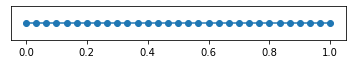

In [3]:
plot(mesh)

In [4]:
tol = 1E-14
subdomain0 = CompiledSubDomain('x[0] <= 0.5 + tol', tol=tol)

In [5]:
# Create a MeshFunction to mark the subdomain
subdomain_marker = MeshFunction("size_t", mesh, mesh.topology().dim())
subdomain_marker.set_all(0)  # Initialize the subdomain marker

# Mark the cells inside the subdomain with value 1
subdomain0.mark(subdomain_marker, 1)

$$\Omega_0 = (0, 0.5)$$

In [6]:
# Define the measure over the subdomain
dx_subdomain = Measure("dx", mesh, subdomain_data=subdomain_marker)

In [7]:
Uh = FunctionSpace(mesh,'CG',1)
uh = Function(Uh)

In [8]:
identity = Expression('x[0]',degree=1)
uh.assign(identity)

whole domain
$$\int_{0}^{1} x\, dx = \frac{1}{2} = 0.5$$

In [9]:
assemble(uh*(dx))

0.5

inside the subdomain
$$\int_{0}^{0.5} x\, dx = \frac{1}{8} = 0.125$$

In [10]:
assemble(uh*(dx_subdomain(1)))

0.12499999999999999

outside the domain
$$\int_{0.5}^{1} x\, dx = \frac{3}{8} = 0.375$$

In [11]:
assemble(uh*(dx_subdomain(0)))

0.37500000000000006